In [1]:
import yfinance as yf
import streamlit as st
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
import numpy as np

%matplotlib inline


In [2]:

# Define the stock symbol for NVIDIA
stock_symbol = 'NVDA'

# Get the current date
today = datetime.today()

# Download NVIDIA stock data from 2020-01-01 to the current date
nvidia_stock = yf.download(stock_symbol, start="2020-01-01", end=today)

# Display the first few rows of the data
print(nvidia_stock.head())

# Optionally save it to a CSV file
nvidia_stock.to_csv('nvidia_stock.csv')

[*********************100%***********************]  1 of 1 completed

               Open     High      Low    Close  Adj Close     Volume
Date                                                                
2020-01-02  5.96875  5.99775  5.91800  5.99775   5.973123  237536000
2020-01-03  5.87750  5.94575  5.85250  5.90175   5.877516  205384000
2020-01-06  5.80800  5.93175  5.78175  5.92650   5.902164  262636000
2020-01-07  5.95500  6.04425  5.90975  5.99825   5.973620  314856000
2020-01-08  5.99400  6.05100  5.95375  6.00950   5.984824  277108000


In [3]:
print(nvidia_stock.size)
print(nvidia_stock.shape)



7278
(1213, 6)


<Axes: xlabel='Date'>

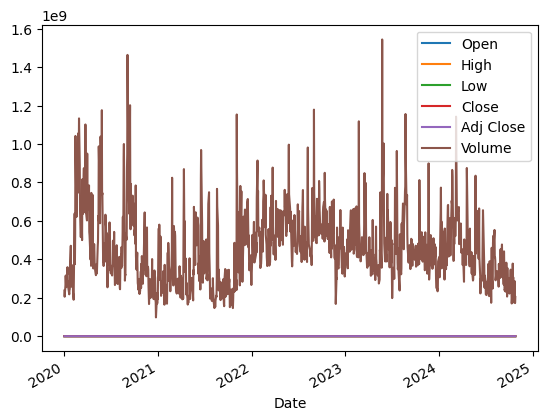

In [4]:
nvidia_stock.plot()


In [5]:
# Streamlit app title
st.title('NVIDIA Stock Trend for This Month')

# Define the stock symbol for NVIDIA
stock_symbol = 'NVDA'

# Get today's date and the start of the current month
start_of_month = today.replace(day=1)

2024-10-26 21:09:25.120 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-26 21:09:25.249 
  command:

    streamlit run /Users/neo_chara/Desktop/Projects/Stock-Watch/sw_venv/lib/python3.10/site-packages/ipykernel_launcher.py [ARGUMENTS]
2024-10-26 21:09:25.249 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


[*********************100%***********************]  1 of 1 completed
2024-10-26 21:09:25.346 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-26 21:09:25.347 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-26 21:09:25.347 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-26 21:09:25.347 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-26 21:09:25.351 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-26 21:09:25.351 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-26 21:09:25.351 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-26 21:09:25.352 Thread 'MainThread': miss

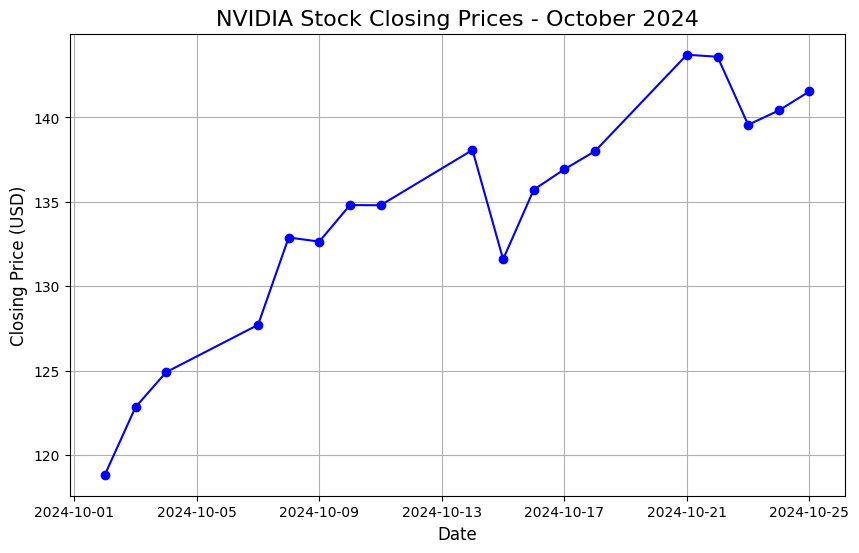

In [6]:
# Download NVIDIA stock data for this month
nvidia_stock_this_month = yf.download(stock_symbol, start=start_of_month, end=today.strftime('%Y-%m-%d'))

# Display the raw data in Streamlit
st.write(f"NVIDIA Stock Data from {start_of_month.strftime('%Y-%m-%d')} to {today.strftime('%Y-%m-%d')}")
st.dataframe(nvidia_stock_this_month)

# Check if data is available
if not nvidia_stock_this_month.empty:
    # Plot the closing prices using Matplotlib
    st.write("Closing Price Trend")

    plt.figure(figsize=(10, 6))
    plt.plot(nvidia_stock_this_month.index, nvidia_stock_this_month['Close'], marker='o', linestyle='-', color='b')
    plt.title(f'NVIDIA Stock Closing Prices - {today.strftime("%B %Y")}', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Closing Price (USD)', fontsize=12)
    plt.grid(True)

    # Render the Matplotlib plot in Streamlit
    st.pyplot(plt)
else:
    st.write("No stock data available for this month.")

In [7]:
nvidia_stock_this_month.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
nvidia_stock_this_month.at[pd.Timestamp('2024-10-04 00:00:00'),'Open'] = np.nan
nvidia_stock_this_month.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-10-02,116.440002,119.379997,115.139999,118.849998,118.849998,221845900
2024-10-03,120.919998,124.360001,120.339996,122.849998,122.849998,277118000
2024-10-04,NaN,125.040001,121.830002,124.919998,124.919998,243678100
2024-10-07,124.989998,130.639999,124.949997,127.720001,127.720001,346250200
2024-10-08,130.259995,133.479996,129.419998,132.889999,132.889999,285722500


In [9]:
nvidia_stock_this_month.index

DatetimeIndex(['2024-10-02', '2024-10-03', '2024-10-04', '2024-10-07',
               '2024-10-08', '2024-10-09', '2024-10-10', '2024-10-11',
               '2024-10-14', '2024-10-15', '2024-10-16', '2024-10-17',
               '2024-10-18', '2024-10-21', '2024-10-22', '2024-10-23',
               '2024-10-24', '2024-10-25'],
              dtype='datetime64[ns]', name='Date', freq=None)

### EWMA 26/10/24

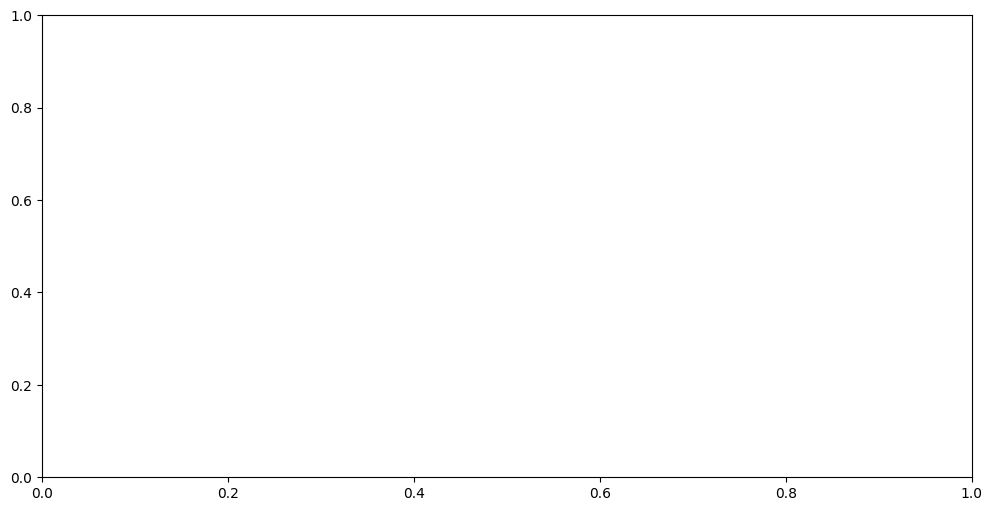

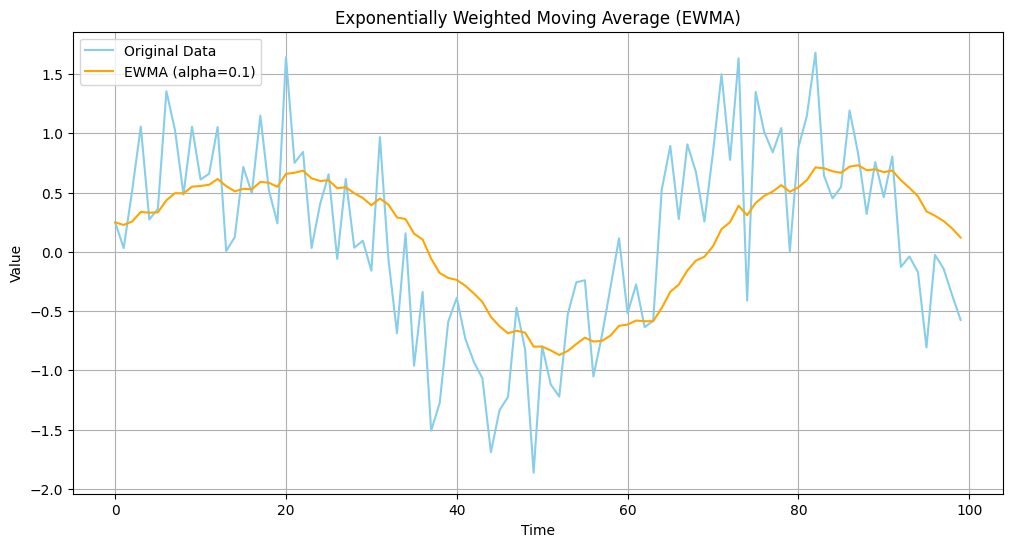

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


In [19]:
# Generate sample data: a noisy sine wave
np.random.seed(42)
time = np.arange(0, 100, 1)
data_sin = np.sin(0.1 * time) + np.random.normal(0, 0.5, len(time))

# Set the smoothing factor (alpha)
alpha = 0.1

# Calculate the EWMA
ewma_data = pd.Series(data_sin).ewm(alpha=alpha, adjust=False).mean()

# Plot the original data and the EWMA
plt.figure(figsize=(12, 6))
plt.plot(time, data_sin, label='Original Data', color='skyblue')
plt.plot(time, ewma_data, label=f'EWMA (alpha={alpha})', color='orange')
plt.title('Exponentially Weighted Moving Average (EWMA)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

print(time)

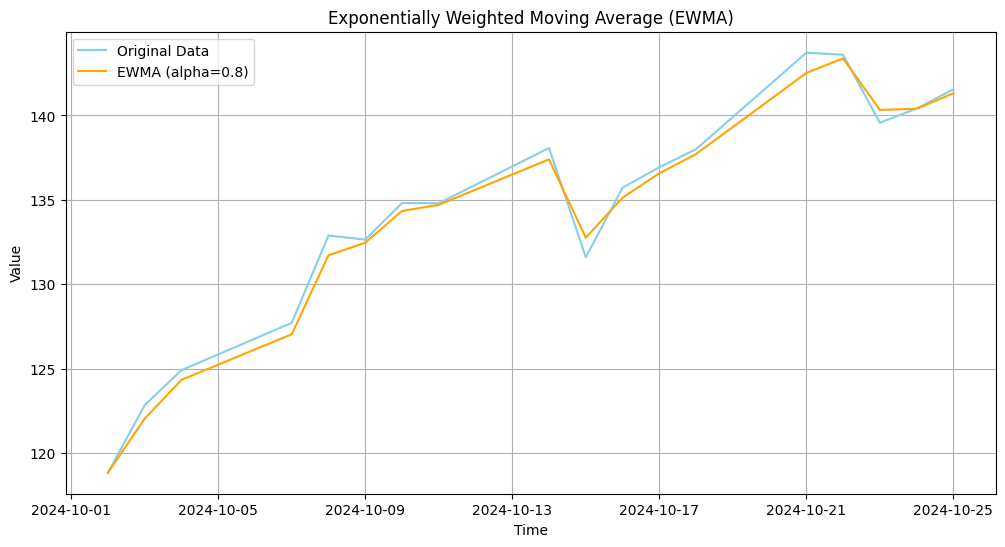

In [22]:
nvda_close = nvidia_stock_this_month['Close']

alpha = 0.3
ewma_nvda_closing = pd.Series(nvda_close).ewm(alpha=alpha, adjust=False).mean()

# Plot the original data and the EWMA
plt.figure(figsize=(12, 6))
plt.plot(nvda_close, label='Original Data', color='skyblue')
plt.plot(ewma_nvda_closing, label=f'EWMA (alpha={alpha})', color='orange')
plt.title('Exponentially Weighted Moving Average (EWMA)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()